<h1>1. Import necessary packages</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline


<h1>2. Basic Exploration and Data Analysis</h1>

In [2]:
df = pd.read_csv("./datasets/Online Retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [4]:
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  541909
Number of columns in dataset is:  8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print("Number of unique customers IDs:", len(df['CustomerID'].unique().tolist()))

Number of unique customers IDs: 4373


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
cancelled = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/01/2010 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/01/2010 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24:00,0.29,17548.0,United Kingdom


In [9]:
cancelled[cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
print("Number of cancelled transactions:", len(cancelled))
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 9288
Total number of transaction with negative quantity: 10624


In [11]:
df[df['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/01/2010 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/01/2010 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/01/2010 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/01/2010 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/01/2010 14:34:00,0.0,NaN,United Kingdom


In [12]:
df[df['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,08/12/2011 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,08/12/2011 14:52:00,-11062.06,NaN,United Kingdom


In [14]:
d = df[~df['InvoiceNo'].astype(str).str.contains('C')]  
print("Number of of transactions with negative quantity value among non cancelled transactions:" ,len(d[d['Quantity']<=0]))
print("Number of of transactions with zero price and negative quantity" ,len(d[(d['Quantity']<=0) & (d['UnitPrice'] == 0)]))

Number of of transactions with negative quantity value among non cancelled transactions: 1336
Number of of transactions with zero price and negative quantity 1336


In [15]:
print("Percentage of cancelled transactions:" , round(len(cancelled)/len(df)*100, 2),"%")
print("Precentage of transactions with zero or negative price" ,round(len(df[df['UnitPrice']<=0])/len(df)*100, 2),"%")

Percentage of cancelled transactions: 1.71 %
Precentage of transactions with zero or negative price 0.46 %


In [16]:
data = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [18]:
print("Number of duplicated transactions:", len(data[data.duplicated()]))

Number of duplicated transactions: 5226


In [19]:
data.drop_duplicates(inplace = True)

In [21]:
data = data.dropna(subset=['CustomerID'])

## 2.1 Descriptions

In [22]:
data['Description'] = data['Description'].str.lower()

In [23]:
print("Number of unique descriptions:", len(data['Description'].unique().tolist()))

Number of unique descriptions: 3877


In [24]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [25]:
data['Description'] = data['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True) 

In [26]:
print("Number of unique descriptions:", len(data['Description'].unique().tolist()))

Number of unique descriptions: 3867


## 2.2 Stock Codes

In [27]:
data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]

In [28]:
len(data['StockCode'].unique().tolist())

3659

## 2.3 Dates

In [29]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'] = data['InvoiceDate'].dt.tz_localize('UTC')


In [30]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

In [31]:
data['WeekDay'] = data['InvoiceDate'].dt.day_name()

In [32]:
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))

In [33]:
data['hour'] = data['InvoiceDate'].dt.hour

In [34]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00+00:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00+00:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00+00:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00+00:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00+00:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8


In [35]:
data['revenue'] = data['UnitPrice'] * data['Quantity']

Dataframes for plots:

In [36]:
plot = pd.DataFrame(data.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(data.groupby(['WeekDay'])['InvoiceNo'].count())
plot3 = pd.DataFrame(data.groupby(['hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(data.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(data.groupby(['month_year'])['revenue'].sum()).reset_index()

In [37]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

## How many orders per month?

In [38]:
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = plot)

## How many orders per day?

In [39]:
ax = sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)

## How many orders per hour?

In [41]:
ax = sns.barplot(x="hour", y="InvoiceNo", data = plot3)

## Which month brings the highest revenue?

In [44]:
ax = sns.lineplot(x = 'month_year', y='revenue', data = plot5)

## 2.3 Price

In [45]:
pd.DataFrame(data['UnitPrice'].describe())

,UnitPrice
count,391150.000000
mean,2.874372
std,4.284738
min,0.040000
25%,1.250000
50%,1.950000
75%,3.750000
max,649.500000


In [46]:
data[data['UnitPrice']>50]['Description'].unique().tolist()

['rustic  seventeen drawer sideboard',
 'vintage post office cabinet',
 'vintage red kitchen cabinet',
 'regency mirror with shutters',
 'love seat antique white metal',
 'vintage blue kitchen cabinet',
 'school desk and chair ',
 'chest natural wood 20 drawers',
 'decorative hanging shelving unit',
 'picnic basket wicker 60 pieces']

## Price distribution of expensive goods :

In [47]:
sns.distplot(data[data['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);

## 2.3 Transactions by countries

In [48]:
customer_country=data[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)


,Country,CustomerID
35,United Kingdom,3916
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


In [49]:
print("Transactions were made in", len(data['Country'].unique().tolist()), "different countries")

Transactions were made in 37 different countries


In [50]:
print("Number of transactions where country is unspecified:", len(data[data['Country']=='Unspecified']))

Number of transactions where country is unspecified: 241


Dataframe for plots:

In [51]:
plot6 = pd.DataFrame(data.groupby(['Country'])['revenue'].sum()).reset_index()
plot6 = plot6.sort_values(['revenue']).reset_index(drop=True)
plot7 = pd.DataFrame(data.groupby(['Country'])['revenue'].count()).reset_index()
plot7 = plot7.sort_values(['revenue']).reset_index(drop=True)

## The most sales makes United Kingdom

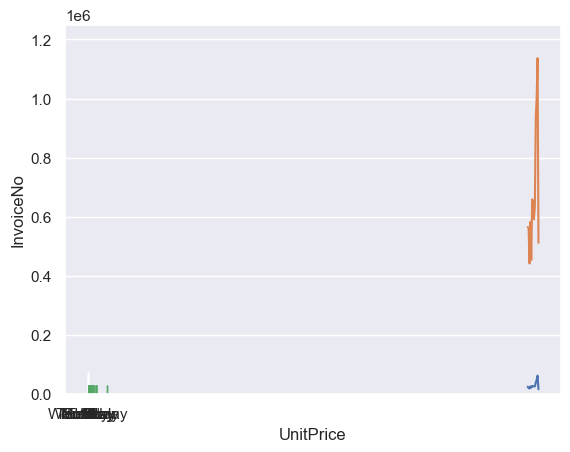

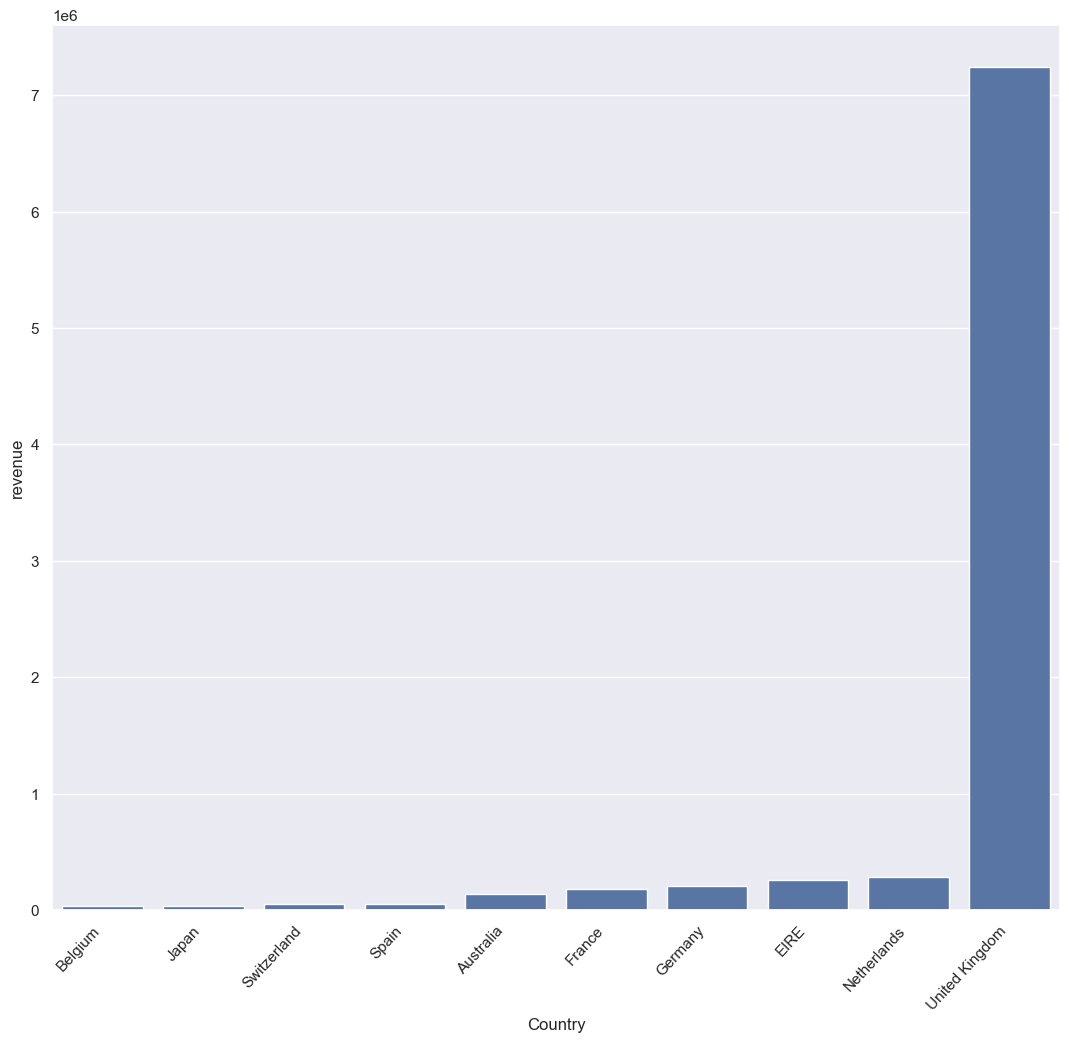

In [52]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='revenue',data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

## Countries by number of orders:

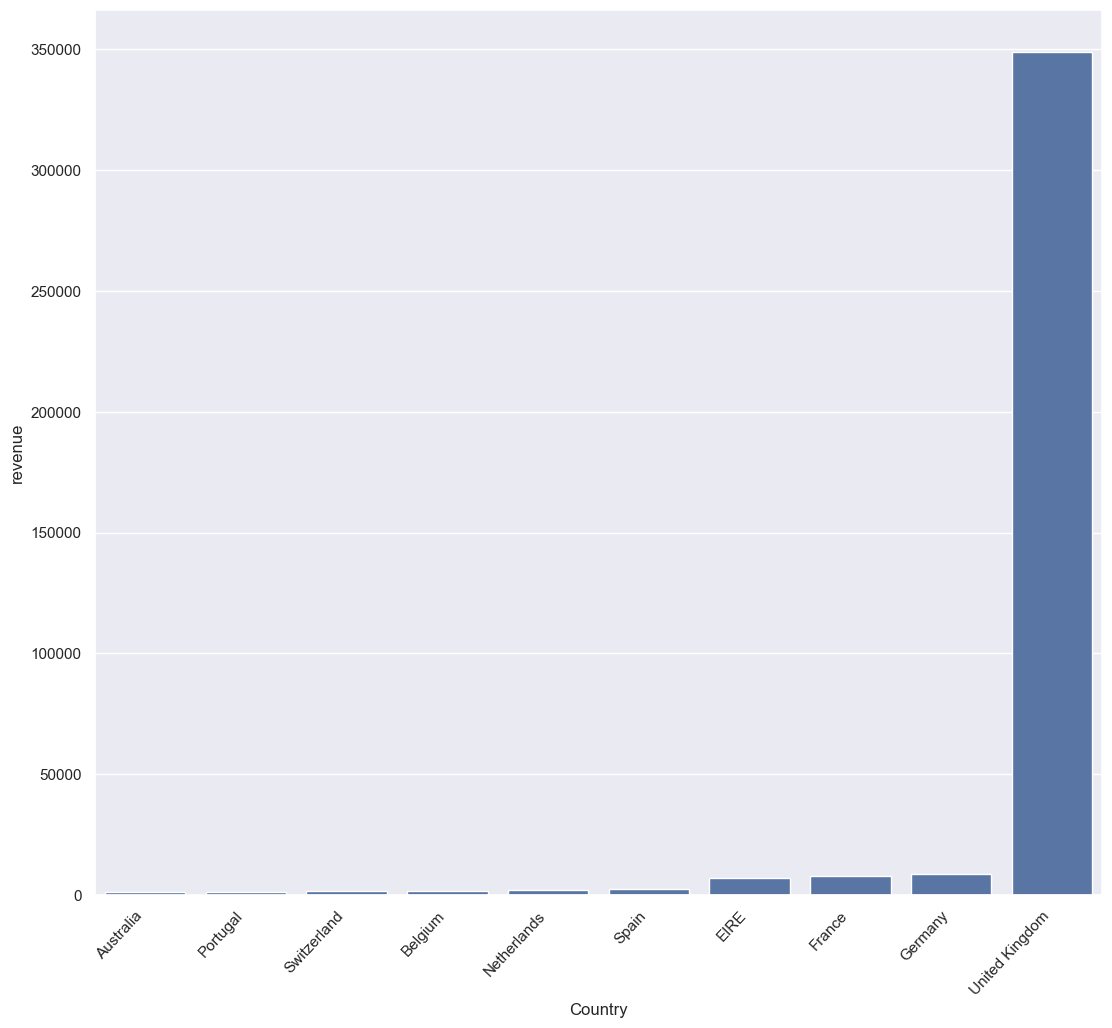

In [53]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='revenue',data=plot7.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

# 3. Analysis

## 3.1 Top Customers

In [54]:
data['freq'] = data.groupby('CustomerID')['CustomerID'].transform('count')

In [55]:
customer  = pd.DataFrame(data.groupby(['CustomerID'])['revenue'].sum().sort_values(ascending=False)).reset_index().head(10)



In [56]:
customer['CustomerID'].tolist()

[14646.0,
 18102.0,
 17450.0,
 16446.0,
 14911.0,
 12415.0,
 14156.0,
 17511.0,
 12346.0,
 16029.0]

In [ ]:
top_customer = data[data['CustomerID'].isin(customer['CustomerID'].tolist())][['CustomerID', 'Country', 'revenue', 'Quantity', 'freq']]

In [ ]:
top_customer['Country'].unique().tolist()